![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions:

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

Documentaries           151
Children                107
Stand-Up                 72
Uncategorized            40
Comedies                 15
Dramas                   12
Classic Movies            8
Action                    6
International Movies      3
Anime Features            3
Music                     2
Horror Movies             1
Name: genre, dtype: int64


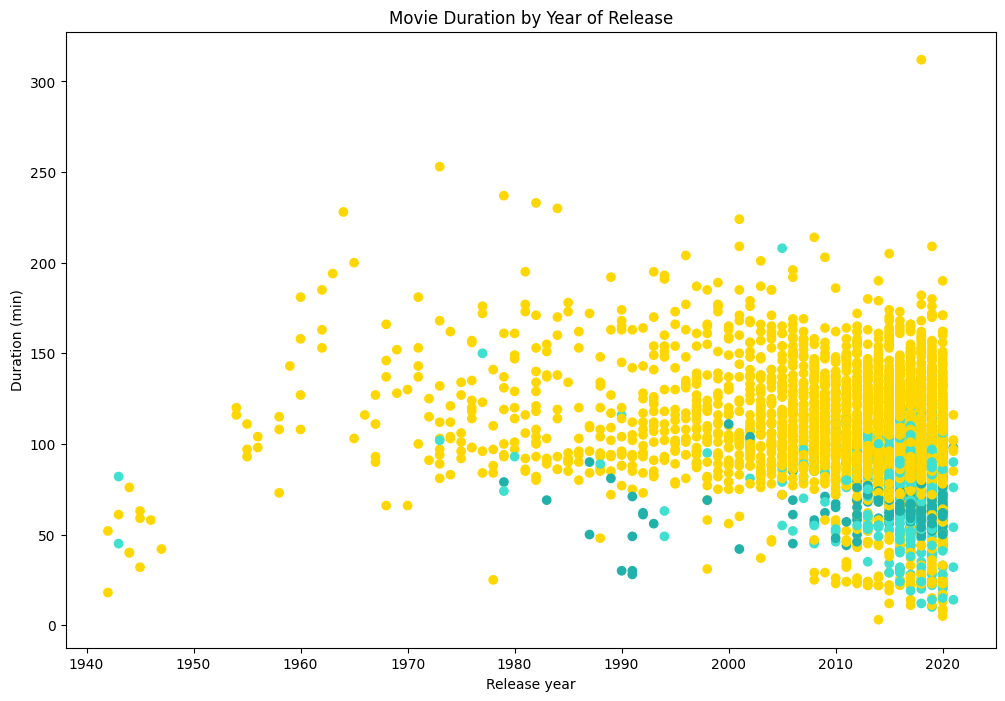

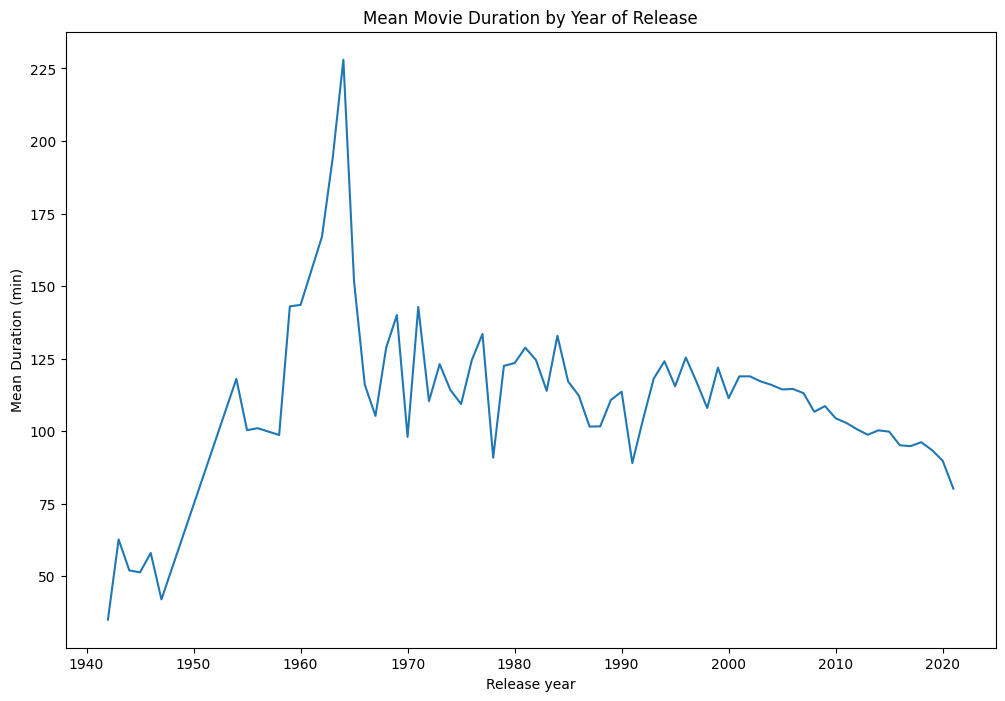

In [8]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Loading CSV File
netflix_df = pd.read_csv("netflix_data.csv")

# Removing TV Shows
netflix_subset = netflix_df[netflix_df["type"]!="TV Show"]

# Keeping only relevant columns: title, country, genre, release_year, duration
netflix_movies = netflix_subset[["title","country","genre","release_year","duration"]]

# Movies shorter than 60 minutes: most of them are documentaries, children or stand-up
short_movies = netflix_movies[netflix_movies["duration"]<60]
print(short_movies["genre"].value_counts(sort=True))


# Creating a List of colors for each movie genre in netflix_movies
colors=[]
netflix_movies.reset_index()

for index,row in netflix_movies.iterrows():
    if row['genre'] == 'Chidren':
            colors.append("aquamarine")
    elif row['genre'] == 'Documentaries':
            colors.append("turquoise")
    elif row['genre'] == 'Stand-Up':
            colors.append("lightseagreen")
    else:
            colors.append("gold")
            
            
# Creating a scatter plot release_year / duration to answer: Are we certain that movies are getting shorter?
fig = plt.figure(figsize=[12, 8]) 
plt.scatter(x=netflix_movies["release_year"], y=netflix_movies["duration"], c=colors)
plt.xlabel("Release year")
plt.ylabel("Duration (min)")
plt.title("Movie Duration by Year of Release")
plt.show()

# Are we certain that movies are getting shorter?: the scatter plot did not establish a clear answer
# Creating an histogram with the mean duration per year of release
fig = plt.figure(figsize=[12, 8]) 
netflix_movies.groupby("release_year")["duration"].mean().plot(kind="line", title="Mean Movie Duration by Year of Release")
plt.xlabel("Release year")
plt.ylabel("Mean Duration (min)")

# We can see that the trend line is slowly going down
answer= "maybe"
